In [2]:
%%time
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import utils as u
from keras import losses, optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import multiprocessing
from skimage.util import random_noise, img_as_float
from keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

Wall time: 1min 39s


In [3]:
from tensorflow import keras
model = keras.models.load_model('cityscapessss.h5')

In [4]:
from tensorflow.keras.models import load_model
new_model = load_model('cityscapessss.h5')

In [5]:
weights = new_model.get_weights()

In [6]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [7]:
masks=[]
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Reference/gtFine/Train/aachen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename),0)
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
       # img3gs = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
        masks.append(res)

In [8]:
%%time
images=[]
for dirname, _, filenames in os.walk('D:/semester_7/project1/cityScape2-wb/Input/Train/aachen'):
    for filename in filenames:
        
        image = cv2.imread(os.path.join(dirname, filename))
        res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
        
        images.append(res)

Wall time: 47.8 s


In [9]:
import gtts  #google text to speech
from playsound import playsound

In [106]:
lables = {
    0 :'unlabeled'             ,
	1 :'ego vehicle'           ,
	2 :'rectification border'  ,
	3 :'out of roi'            ,
	4 :'static'                ,
	5 :'dynamic'               ,
	6 :'ground'                ,
	7 :'road'                  ,
	8 :'sidewalk'              ,
	9 :'parking'               ,
	10 :'rail track'            ,
	11 :'building'              ,
	12 :'wall'                  ,
	13 :'fence'                 ,
	14 :'guard rail'            ,
	15 :'bridge'                ,
	16 :'tunnel'                ,
	17 :'pole'                  ,
	18 :'polegroup'             ,
	19 :'traffic light'         ,
	20 :'traffic sign'          ,
	21 :'vegetation'            ,
	22 :'terrain'               ,
	23 :'sky'                   ,
	24 :'person'                ,
	25 :'rider'                 ,
	26 :'car'                   ,
	27 :'truck'                 ,
	28 :'bus'                   ,
	29 :'caravan'               ,
	30 :'trailer'               ,
	31 :'train'                 ,
	32 :'motorcycle'            ,
	33 :'bicycle'               ,
	-1 :'license plate'         ,
}

In [10]:
def compareMasks(numbers, model):
        lables = {
            0 :'unlabeled'             ,
			1 :'ego vehicle'           ,
			2 :'rectification border'  ,
			3 :'out of roi'            ,
			4 :'static'                ,
			5 :'dynamic'               ,
			6 :'ground'                ,
			7 :'road'                  ,
			8 :'sidewalk'              ,
			9 :'parking'               ,
			10 :'rail track'            ,
			11 :'building'              ,
			12 :'wall'                  ,
			13 :'fence'                 ,
			14 :'guard rail'            ,
			15 :'bridge'                ,
			16 :'tunnel'                ,
			17 :'pole'                  ,
			18 :'polegroup'             ,
			19 :'traffic light'         ,
			20 :'traffic sign'          ,
			21 :'vegetation'            ,
			22 :'terrain'               ,
			23 :'sky'                   ,
			24 :'person'                ,
			25 :'rider'                 ,
			26 :'car'                   ,
			27 :'truck'                 ,
			28 :'bus'                   ,
			29 :'caravan'               ,
			30 :'trailer'               ,
			31 :'train'                 ,
			32 :'motorcycle'            ,
			33 :'bicycle'               ,
			-1 :'license plate'         ,
		}
        for number in numbers:
            imgLables = []                                                
            s=model.predict(np.expand_dims(images[number], axis = 0))
            #print(s[0])
            #print(np.unique(s))
            check = np.zeros((128, 128), dtype=np.uint8)
            for i in range(0, len(s[0])):
                check[i]= np.argmax(s[0][i], axis = 1)
            print(np.unique(check))
            uniq = np.unique(check)
            for i in range (len(uniq)):
                #print(lables[i])
                imgLables.append(lables[i])
            ss= addColors(check)
            mm= addColors(masks[number])
            f, axarr = plt.subplots(1,2)
            ax1=axarr[0].imshow(ss)
            ax2=axarr[1].imshow(mm)
            print(imgLables)
            lablesString=''
            for i in range (len(imgLables)):
                lablesString = lablesString +' .'+ imgLables[i] 
            # make a request to google to get synthesis  
            t1 = gtts.gTTS(lablesString)
            # save the audio file  
            #el gded bi override el adem (change by concatinating the name + i + .mp3)
            t1.save("outputlables.mp3")
            # play the audio file  
           # playsound("output.mp3")
def addColors(gg):
        im = np.zeros([gg.shape[0],gg.shape[1],3],dtype=np.uint8)

        for i in range(gg.shape[0]):
    
             for u in range(gg.shape[1]):
                if gg[i,u]==-1:
                        im[i,u]= np.array([ 0,  0,142])
                if gg[i,u]==33:
                        im[i,u]= np.array([119, 11, 32])
                if gg[i,u]==32:
                        im[i,u]= np.array([  0,  0,230])
                if gg[i,u]==31:
                        im[i,u]= np.array([  0, 80,100])
                if gg[i,u]==30:
                        im[i,u]= np.array([ 0,  0,110])
                if gg[i,u]==29:
                        im[i,u]= np.array([  0,  0, 90])
                if gg[i,u]==28:
                        im[i,u]= np.array([  0, 60,100])
                if gg[i,u]==27:
                        im[i,u]= np.array([  0,  0, 70])
                if gg[i,u]==26:
                        im[i,u]= np.array([  0,  0,142])
                if gg[i,u]==25:
                        im[i,u]= np.array([255,  0,  0])
                if gg[i,u]==24:
                        im[i,u]= np.array([220, 20, 60])
                if gg[i,u]==23:
                        im[i,u]= np.array([70,130,180])
                if gg[i,u]==22:
                        im[i,u]= np.array([152,251,152])
                if gg[i,u]==21:
                        im[i,u]= np.array([107,142, 35])
                if gg[i,u]==20:
                        im[i,u]= np.array([220,220,  0])
                if gg[i,u]==19:
                        im[i,u]= np.array([250,170, 30])
                if gg[i,u]==18:
                        im[i,u]= np.array([153,153,153])
                if gg[i,u]==17:
                        im[i,u]= np.array([153,153,153])
                if gg[i,u]==16:
                        im[i,u]= np.array([150,120, 90])
                if gg[i,u]==15:
                        im[i,u]= np.array([150,100,100])
                if gg[i,u]==14:
                        im[i,u]= np.array([180,165,180])
                if gg[i,u]==13:
                        im[i,u]= np.array([190,153,153])
                if gg[i,u]==12:
                        im[i,u]= np.array([102,102,156])
                if gg[i,u]==11:
                        im[i,u]= np.array([70, 70, 70])
                if gg[i,u]==10:
                        im[i,u]= np.array([230,150,140])
                if gg[i,u]==9:
                        im[i,u]= np.array([250,170,160])
                if gg[i,u]==8:
                        im[i,u]= np.array([244, 35,232])
                if gg[i,u]==7:
                        im[i,u]= np.array([128, 64,128])
                if gg[i,u]==6:
                        im[i,u]=np.array([81,  0, 81])
                if gg[i,u]==4:
                        im[i,u]=np.array([  0,  0,  0])
                if gg[i,u]==5:
                        im[i,u]=np.array([111, 74,  0])
                if gg[i,u]==3:
                        im[i,u]=np.array([  0,  0,  0])
                if gg[i,u]==2:
                        im[i,u]=np.array([ 0,  0,  0])
                if gg[i,u]==1:
                        im[i,u]=np.array([  0,  0,  0])
                if gg[i,u]==0:
                        im[i,u]=np.array([  0,  0,  0])
        return im

[ 1  2  3  4  5  6  7  8 10 11 12 14 15 16 17 21 22 23 26]
['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence', 'guard rail', 'bridge', 'tunnel', 'pole', 'polegroup']
[ 1  2  3  4  5  6  7  8 11 19 26]
['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track']


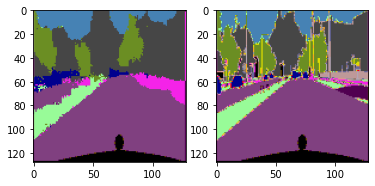

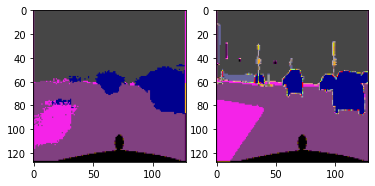

In [11]:
compareMasks([1,3], model)
 

In [12]:
print(np.unique(masks[1]))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]


In [13]:
print(np.unique(masks[6]))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]


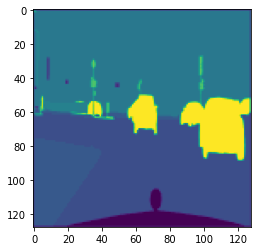

In [14]:
plt.imshow(masks[3])

In [15]:
np.unique(masks[0])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=uint8)

In [16]:
np.unique(masks[1])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

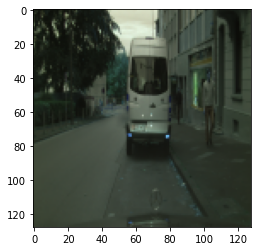

In [17]:
plt.imshow(images[len(images)-1])

In [18]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


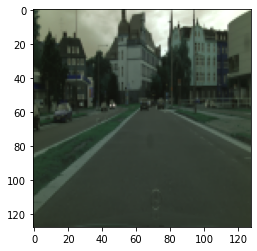

In [19]:
plt.imshow(images[1])

In [ ]:
#import visualkeras
#visualkeras.layered_view(model) 

In [ ]:
#import visualkeras
#visualkeras.layered_view(new_model) 

In [67]:
#import pixellib
#from pixellib.instance import instance_segmentation
#segment_image = instance_segmentation()
#segment_image.load_model("mask_rcnn_coco.h5")
#D:\semester_7\project1\cityScape2-wb\Reference\gtFine\Train\aachen
#segment_image.segmentImage('D:/semester_7/project1/cityScape2-wb/Reference/gtFine/Train/aachen/aachen_000000_000019_gtFine_labelIds.png',show_bboxes = True, output_image_name = "output1.jpg")


In [65]:

#segment_image.segmentImage("D:/semester_7/project1/cityScape2-wb/Input/Train/aachen/aachen_000000_000019_leftImg8bit.png",show_bboxes = True, output_image_name = "output2.jpg")

In [20]:
"""
from PIL import Image
bg = Image.open("D:/semester_7/project1/cityScape2-wb/Input/Train/aachen/aachen_000000_000019_leftImg8bit.png")
bgr=bg.resize(128,128)
fg = Image.open("D:/semester_7/project1/cityScape2/Reference/gtFine/Train/aachen/aachen_000000_000019_gtFine_color.png")
fgr=fg.resize(128,128)
# set alpha to .7
Image.blend(bgr, fgr, .7).save("out.png")
"""
import cv2

image = cv2.imread("D:/semester_7/project1/cityScape2-wb/Input/Train/aachen/aachen_000000_000019_leftImg8bit.png")
image = cv2.resize(image,(128,128))
overlay = cv2.imread("D:/semester_7/project1/cityScape2/Reference/gtFine/Train/aachen/aachen_000000_000019_gtFine_color.png")
overlay = cv2.resize(overlay,(128,128))

#x, y, w, h = 10, 10, 10, 10  # Rectangle parameters
#cv2.rectangle(overlay, (x, y), (x+w, y+h), (0, 200, 0), -1)  # A filled rectangle

alpha = 0.4  # Transparency factor.

# Following line overlays transparent rectangle over the image
image_new = cv2.addWeighted(overlay, alpha, image, 1 - alpha, 0)

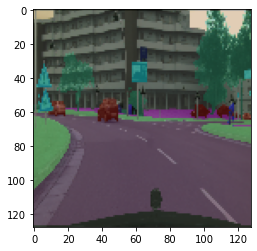

In [21]:
plt.imshow(image_new)

In [22]:
type(overlay)

numpy.ndarray

In [23]:
type(masks[1])

numpy.ndarray

In [24]:
type(model)

keras.engine.functional.Functional

In [26]:
import numpy as np
import cv2
def dividimg(img,pts):
    img = cv2.resize(img,(256,128))
    ## (1) Crop the bounding rect
    rect = cv2.boundingRect(pts)
    x,y,w,h = rect
    croped = img[y:y+h, x:x+w].copy()

    ## (2) make mask
    pts = pts - pts.min(axis=0)

    mask = np.zeros(croped.shape[:2], np.uint8)
    cv2.drawContours(mask, [pts], -1, (255, 255, 255), -1, cv2.LINE_AA)

    ## (3) do bit-op
    dst = cv2.bitwise_and(croped, croped, mask=mask)

    ## (4) add the white background
    bg = np.ones_like(croped, np.uint8)*255
    cv2.bitwise_not(bg,bg, mask=mask)
    dst2 = bg+ dst
    return (dst2)

#plt.imshow(dst2)

In [ ]:
identify lables in each cropped image 
put conditions that if the no of pixels is that image is less than x then discard this item

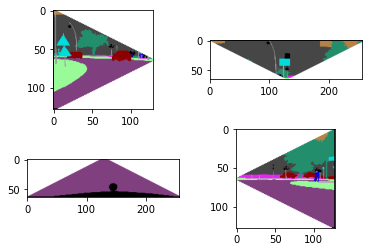

In [27]:
img = cv2.imread('D:/semester_7/project1/cityScape2/Reference/gtFine/Train/aachen/aachen_000000_000019_gtFine_color.png')

ptsleft = np.array([[0,0],[0,128],[128,64]])
ptsup = np.array([[0,0],[256,0],[128,64]])
ptsdown = np.array([[0,128],[128,64],[256,128]])
ptsright = np.array([[256,128],[128,64],[256,0]])
f, axarr = plt.subplots(2,2)
imgleft = dividimg(img,ptsleft)
imgup = dividimg(img,ptsup)
imgdown = dividimg(img,ptsdown)
imgright = dividimg(img,ptsright)

axarr[0,0].imshow(imgleft)
axarr[0,1].imshow(imgup)
axarr[1,0].imshow(imgdown)
axarr[1,1].imshow(imgright)

In [79]:
def compareMasks(img, model):
        lables = {
            0 :'unlabeled'             ,
			1 :'ego vehicle'           ,
			2 :'rectification border'  ,
			3 :'out of roi'            ,
			4 :'static'                ,
			5 :'dynamic'               ,
			6 :'ground'                ,
			7 :'road'                  ,
			8 :'sidewalk'              ,
			9 :'parking'               ,
			10 :'rail track'            ,
			11 :'building'              ,
			12 :'wall'                  ,
			13 :'fence'                 ,
			14 :'guard rail'            ,
			15 :'bridge'                ,
			16 :'tunnel'                ,
			17 :'pole'                  ,
			18 :'polegroup'             ,
			19 :'traffic light'         ,
			20 :'traffic sign'          ,
			21 :'vegetation'            ,
			22 :'terrain'               ,
			23 :'sky'                   ,
			24 :'person'                ,
			25 :'rider'                 ,
			26 :'car'                   ,
			27 :'truck'                 ,
			28 :'bus'                   ,
			29 :'caravan'               ,
			30 :'trailer'               ,
			31 :'train'                 ,
			32 :'motorcycle'            ,
			33 :'bicycle'               ,
			-1 :'license plate'         ,
		}
    #    for number in numbers:
        imgLables = []
        s=model.predict(np.expand_dims(img, axis = 0))
        #print(s[0])
        #print(np.unique(s))
        check = np.zeros((128, 128), dtype=np.uint8)
        for i in range(0, len(s[0])):
            check[i]= np.argmax(s[0][i], axis = 1)
        print(np.unique(check))
        uniq = np.unique(check)
        for i in range (len(uniq)):
            #print(lables[i])
            imgLables.append(lables[i])
        ss= check
         # mm= addColors(masks[number])
         #  f, axarr = plt.subplots(1,2)
         # ax1=axarr[0].imshow(ss)
         #   ax2=axarr[1].imshow(mm)
        print(imgLables)
        lablesString=''
        for i in range (len(imgLables)):
            lablesString = lablesString +' .'+ imgLables[i] 
        # make a request to google to get synthesis  
        t1 = gtts.gTTS(lablesString)
        # save the audio file  
        #el gded bi override el adem (change by concatinating the name + i + .mp3)
        t1.save("outputlables.mp3")
        # play the audio file  
        # playsound("output.mp3")
        return ss

[ 1  2  3  4  5  6  7  8 10 11 13 14 21 26]
['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence']


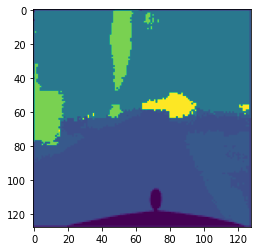

In [80]:
img = cv2.imread('D:/semester_7/project1/cityScape2-wb/Input/Train/bremen/bremen_000000_000019_leftImg8bit.png')
#plt.imshow(img)
img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
#cv2.imshow('img',img)
plt.imshow(compareMasks(img, model))

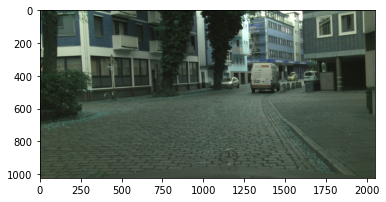

In [34]:
img = cv2.imread('D:/semester_7/project1/cityScape2-wb/Input/Train/bremen/bremen_000000_000019_leftImg8bit.png')
plt.imshow(img)

[ 1  2  3  4  5  6  7  8 10 11 13 14 21 26]
['unlabeled', 'ego vehicle', 'rectification border', 'out of roi', 'static', 'dynamic', 'ground', 'road', 'sidewalk', 'parking', 'rail track', 'building', 'wall', 'fence']


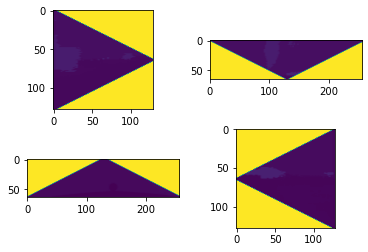

In [81]:
#res = cv2.resize(image, (128,128), interpolation = cv2.INTER_AREA)
img = cv2.imread('D:/semester_7/project1/cityScape2-wb/Input/Train/bremen/bremen_000000_000019_leftImg8bit.png')
img = cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
img =compareMasks(img, model)
#img = cv2.resize(img,(128,128))
ptsleft = np.array([[0,0],[0,128],[128,64]])
ptsup = np.array([[0,0],[256,0],[128,64]])
ptsdown = np.array([[0,128],[128,64],[256,128]])
ptsright = np.array([[256,128],[128,64],[256,0]])
f, axarr = plt.subplots(2,2)
imgleft = dividimg(img,ptsleft)
imgup = dividimg(img,ptsup)
imgdown = dividimg(img,ptsdown)
imgright = dividimg(img,ptsright)

axarr[0,0].imshow(imgleft)
axarr[0,1].imshow(imgup)
axarr[1,0].imshow(imgdown)
axarr[1,1].imshow(imgright)

In [82]:
def audio(img):
    imgLables = []   
	for i in range (len(uniq)):
		#print(lables[i])
		imgLables.append(lables[i])
	print(imgLables)
	lablesString=''
	for i in range (len(imgLables)):
		lablesString = lablesString +' .'+ imgLables[i] 
	# make a request to google to get synthesis  
	t1 = gtts.gTTS(lablesString)
	# save the audio file  
	#el gded bi override el adem (change by concatinating the name + i + .mp3)
	t1.save("outputlables.mp3")
	# play the audio file  
	# playsound("output.mp3")

TabError: inconsistent use of tabs and spaces in indentation (<ipython-input-82-b1dbfb2dba66>, line 3)

In [60]:
def audio(img):
	imgLables = [] 
    check = np.zeros((128, 128), dtype=np.uint8)
    for i in range(0, len(s[0])):
        check[i]= np.argmax(s[0][i], axis = 1)
	print(np.unique(check))
	uniq = np.unique(check)
	for i in range (len(uniq)):
		#print(lables[i])
		imgLables.append(lables[i])
	print(imgLables)
	lablesString=''
	for i in range (len(imgLables)):
		lablesString = lablesString +' .'+ imgLables[i] 
	# make a request to google to get synthesis  
	t1 = gtts.gTTS(lablesString)
	# save the audio file  
	#el gded bi override el adem (change by concatinating the name + i + .mp3)
	t1.save("testleft.mp3")
	# play the audio file  
	# playsound("output.mp3")

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [64]:
def audio(img):
	imgLables = []
	for i in range (len(uniq)):
		#print(lables[i])
		imgLables.append(lables[i])
	print(imgLables)
	lablesString=''
	for i in range (len(imgLables)):
		lablesString = lablesString +' .'+ imgLables[i] 
	# make a request to google to get synthesis  
	t1 = gtts.gTTS(lablesString)
	# save the audio file  
	#el gded bi override el adem (change by concatinating the name + i + .mp3)
	t1.save("outputlables.mp3")
	# play the audio file  
	# playsound("output.mp3")

In [140]:
def audio(img,direction):
    imgLables = []
    lablesString=direction
    uniq = np.unique(img)
    for i in range (len(uniq)):
        if i != 0 and i!=1 and i!=2 and i!=3:
            imgLables.append(lables[i])
    for i in range (len(imgLables)):
        lablesString = lablesString +' .'+ imgLables[i] 
        # make a request to google to get synthesis  
    print(lablesString)
    t1 = gtts.gTTS(lablesString)
        # save the audio file 
    t1.save("testleft.mp3")

In [141]:
direction = 'to the left there is the following '
audio(imgleft,direction)

to the left there is the following  .static .dynamic .ground .road .sidewalk .parking .rail track .building .wall .fence .guard rail .bridge .tunnel .pole .polegroup .traffic light .traffic sign


In [ ]:
[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  18  19  21
  22  25 255]